In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # warning not necessary for these visual/insightful tasks

# Load Data

In [21]:
path = "data/" # Data not present on github, available here : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
artists = pd.read_csv(path+"artists.csv")
tracks = pd.read_csv(path+"tracks.csv")

# Data preparation

In [22]:
def remove_apostrophes(string):
    string = string[1:-1]
    while string[0] in ["'", "\"", " "]:
        string = string[1:]
    return string

In [23]:
artists = artists[artists["genres"] != "[]"]

# The genres of a tracks are in string form '[genre1, genre2]' so they need to be mapped to a true list of string 
# before exploding into a single row for each genre
artists["genres"] = artists["genres"].apply(lambda x: x[1:-1].split(",")) # remove brackets and split genres
artists = artists.explode("genres")
artists["genres"] = artists["genres"].apply(lambda x: remove_apostrophes(x)) # remove apostrophes
artists = artists.rename(columns={"id":"id_artists"})

In [24]:
artists.head(3)

,id_artists,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7


In [25]:
# As for genres, the artists of a tracks are in string form '[artist1, artist2]' so they need to be mapped to a true list of string 
# before exploding into a single row for each artists
tracks["id_artists"] = tracks["id_artists"].apply(lambda x: x[1:-1].split(",")).explode("id_artists") # remove bracket and split artists
tracks["id_artists"] = tracks["id_artists"].apply(lambda x: remove_apostrophes(x)) # remove apostrophes
tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5


In [26]:
genres_years = tracks[["id", "id_artists", "release_date"]]
genres_years = genres_years.merge(artists[["id_artists", "genres", "followers"]], on="id_artists")
genres_years["year"] = genres_years["release_date"].apply(lambda x: int(x[:4]))

In [27]:
genres_years.head(3)

,id,id_artists,release_date,genres,followers,year
0,07A5yehtSnoedViJAZkNnc,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,tango,3528.0,1922
1,07A5yehtSnoedViJAZkNnc,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,vintage tango,3528.0,1922
2,08FmqUhxtyLTn6pAh6bk45,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,tango,3528.0,1922


# Creating data suitable for the visualization

In [28]:
interesting_genres = ["rock", "pop", "rap", "jazz", "adult standards", "classical", "latin", "soul", "folk", "blues", "r&b", "hip hop", "indie", "hard rock"]

In [29]:
new_data = genres_years[genres_years.genres.isin(interesting_genres)].groupby(["genres", "year"]).count().reset_index()[["year", "genres", "id"]]
new_data

,year,genres,id
0,1922,adult standards,60
1,1923,adult standards,43
2,1924,adult standards,20
3,1925,adult standards,52
4,1926,adult standards,190
...,...,...,...
1277,2017,soul,124
1278,2018,soul,130
1279,2019,soul,166
1280,2020,soul,200


## Years

In [30]:
result_years = new_data.pivot(index="year", columns="genres", values="id").fillna(0)
result_years

genres,adult standards,blues,classical,folk,hard rock,hip hop,jazz,latin,pop,r&b,rap,rock,soul
year,,,,,,,,,,,,,
1922,60.0,3.0,2.0,21.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,14.0,12.0
1923,43.0,22.0,4.0,9.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,9.0,48.0
1924,20.0,1.0,5.0,8.0,5.0,2.0,4.0,4.0,9.0,0.0,3.0,17.0,26.0
1925,52.0,0.0,6.0,12.0,3.0,4.0,9.0,0.0,12.0,3.0,5.0,12.0,26.0
1926,190.0,13.0,7.0,35.0,14.0,10.0,106.0,7.0,21.0,5.0,14.0,36.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,197.0,64.0,201.0,100.0,234.0,185.0,108.0,426.0,248.0,60.0,195.0,629.0,124.0
2018,258.0,56.0,284.0,88.0,211.0,217.0,100.0,434.0,358.0,69.0,211.0,549.0,130.0
2019,377.0,58.0,297.0,71.0,195.0,224.0,217.0,345.0,285.0,98.0,218.0,489.0,166.0


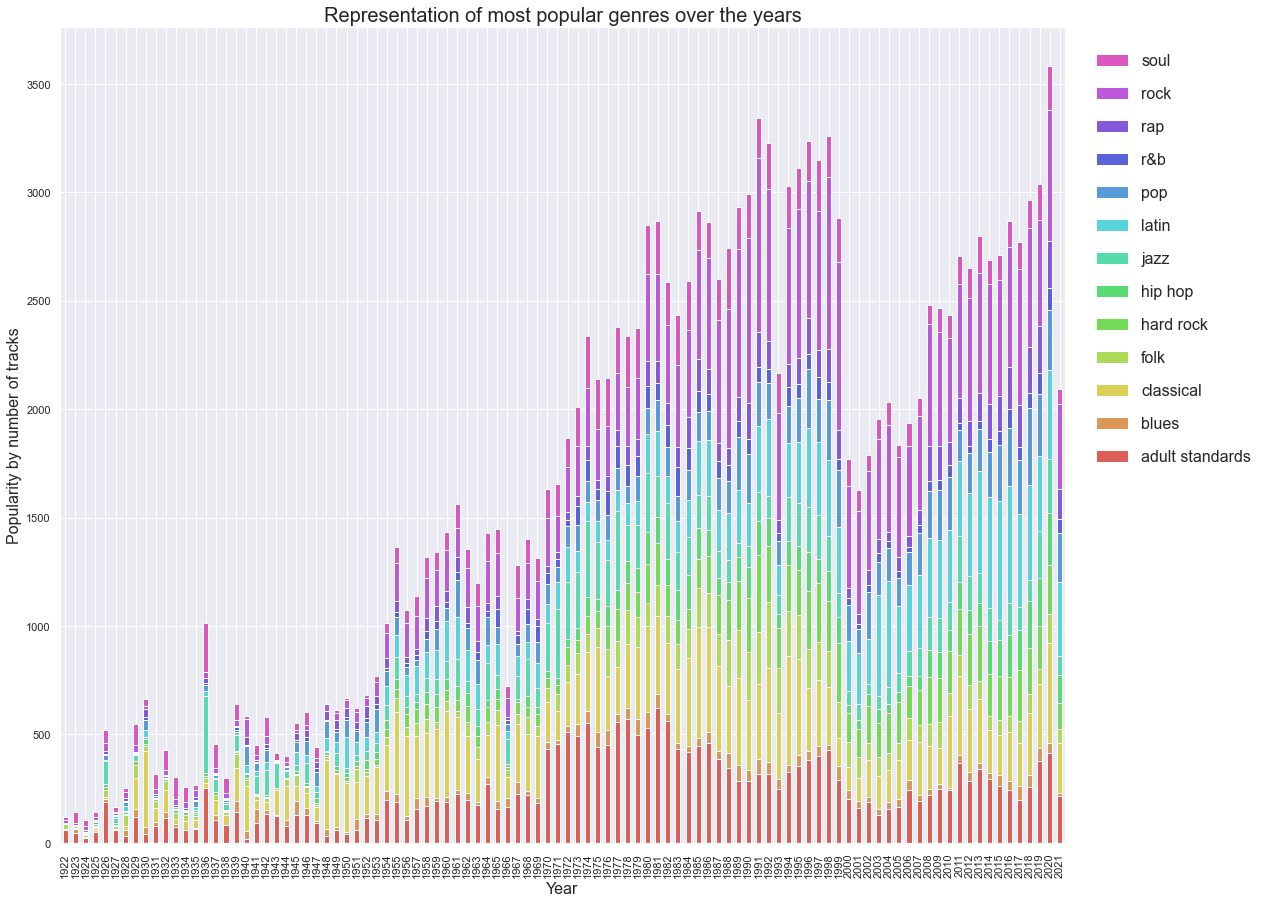

In [31]:
sns.set_theme(palette=sns.color_palette("hls", 14))

result_years.plot(kind="bar", stacked=True, figsize=(18, 15))
plt.title("Representation of most popular genres over the years", fontdict={"fontsize": 20})
plt.ylabel("Popularity by number of tracks", fontdict={"fontsize": 16})
plt.xlabel("Year", fontdict={"fontsize": 16})

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5), fontsize=16, labelspacing=-3, frameon=False)

In [32]:
#result_years.to_csv("genres_years_count.csv", header=True)

## Decades

In [36]:
result_dec = new_data.copy()

# Map to decade
result_dec["year"] = result_dec["year"].apply(lambda x: int(str(x)[:3] + "0"))
result_dec = result_dec.groupby(["year", "genres"]).mean().reset_index()
result_dec

,year,genres,id
0,1920,adult standards,71.500
1,1920,blues,17.500
2,1920,classical,24.125
3,1920,folk,26.125
4,1920,hard rock,6.750
...,...,...,...
138,2020,pop,248.000
139,2020,r&b,84.500
140,2020,rap,178.000
141,2020,rock,499.000


In [37]:
result_dec = result_dec.pivot(index="year", columns="genres", values="id").fillna(0)
result_dec

genres,adult standards,blues,classical,folk,hard rock,hip hop,jazz,latin,pop,r&b,rap,rock,soul
year,,,,,,,,,,,,,
1920,71.5,17.500000,24.125,26.125,6.75,5.666667,22.375,7.500,11.0,3.75,7.833333,18.5,39.0
1930,101.2,18.555556,91.300,29.400,9.60,6.888889,54.600,13.625,16.4,6.60,10.333333,25.6,86.0
1940,87.5,31.500000,131.700,21.200,6.90,12.100000,56.000,33.800,48.9,8.40,25.100000,27.8,37.2
1950,133.3,30.200000,264.700,40.100,40.80,38.600000,53.100,98.100,67.7,21.60,44.400000,113.9,52.5
1960,201.0,29.400000,265.300,51.700,51.90,41.100000,106.200,118.000,92.2,43.90,43.900000,164.1,104.8
1970,497.1,47.900000,250.400,103.400,89.30,68.800000,260.700,106.300,98.0,75.20,55.200000,239.0,195.7
1980,449.0,48.500000,393.800,153.800,161.00,122.100000,166.800,199.100,145.9,89.90,109.700000,484.9,213.1
1990,334.4,48.600000,334.300,207.300,249.70,126.100000,150.800,288.300,210.2,68.50,131.800000,692.0,197.6
2000,190.5,32.500000,165.300,93.200,169.40,64.200000,95.600,330.900,171.7,34.70,76.900000,474.4,94.9


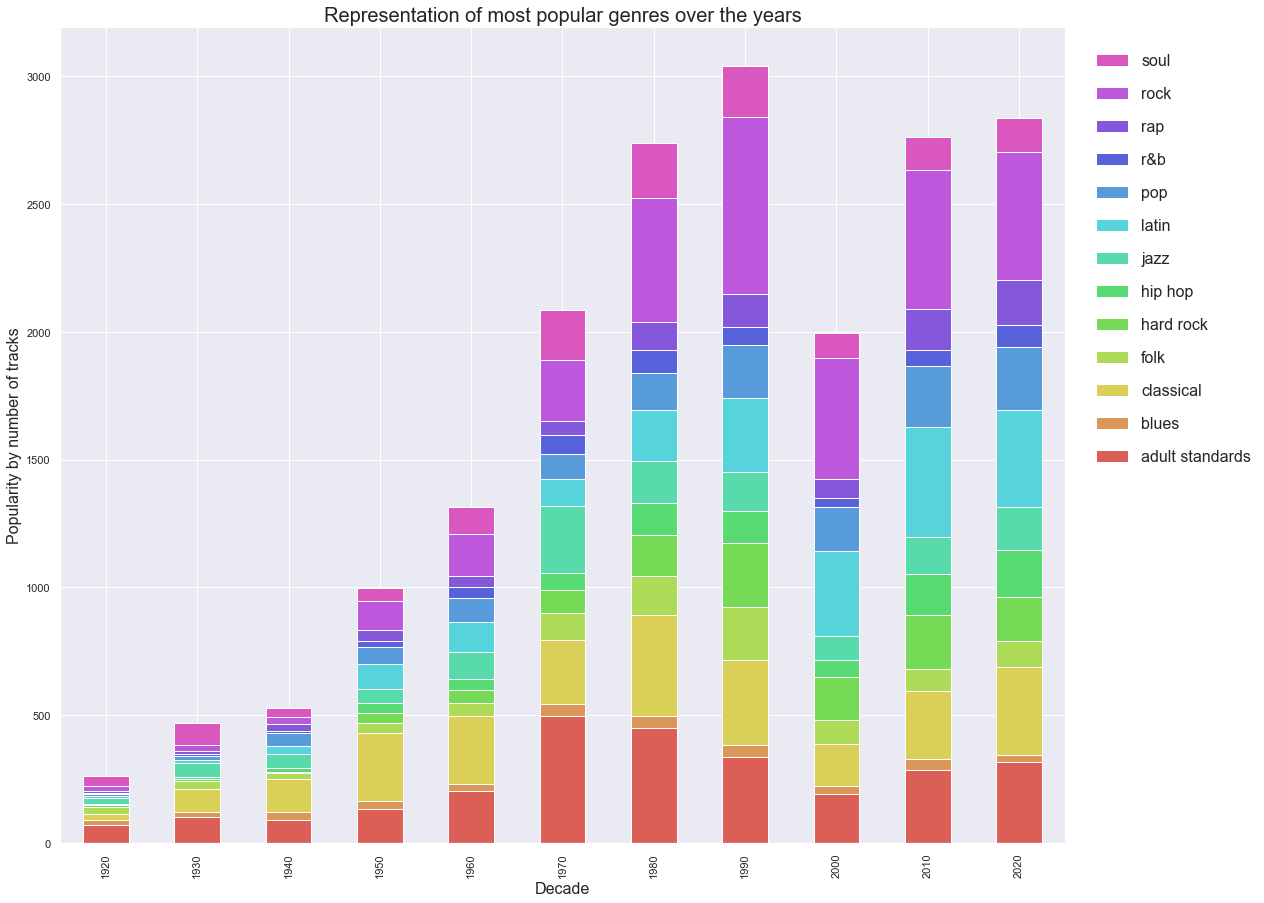

In [38]:
sns.set_theme(palette=sns.color_palette("hls", 14))

result_dec.plot(kind="bar", stacked=True, figsize=(18, 15))
plt.title("Representation of most popular genres over the years", fontdict={"fontsize": 20})
plt.ylabel("Popularity by number of tracks", fontdict={"fontsize": 16})
plt.xlabel("Decade", fontdict={"fontsize": 16})

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5), fontsize=16, labelspacing=-3, frameon=False)

In [ ]:
#result_dec.to_csv("genres_decades_count.csv", header=True)